In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

In [28]:
df = pd.read_csv("train.csv")
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [30]:
df.shape

(17996, 17)

In [31]:
df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

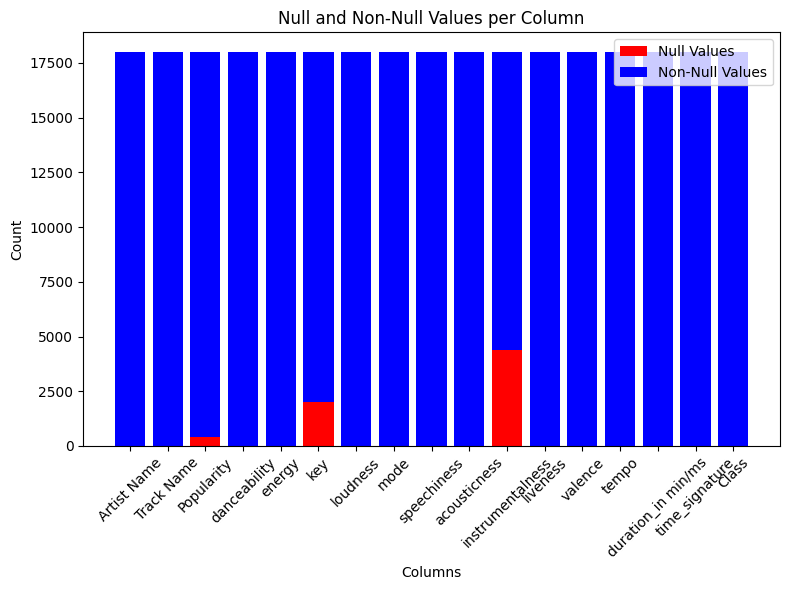

In [32]:
# Calculate the number of null and non-null values in each column
null_counts = df.isnull().sum()
non_null_counts = df.notnull().sum()

# Create a subplot for both null and non-null values
fig, ax = plt.subplots(figsize=(8, 6))

# Plot null values in red
ax.bar(null_counts.index, null_counts, color='red', label='Null Values')

# Plot non-null values in blue on top of null values
ax.bar(non_null_counts.index, non_null_counts, color='blue', bottom=null_counts, label='Non-Null Values')

# Set labels and legend
ax.set_xlabel('Columns')
ax.set_ylabel('Count')
ax.set_title('Null and Non-Null Values per Column')
ax.legend()

# Adjust layout and show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64


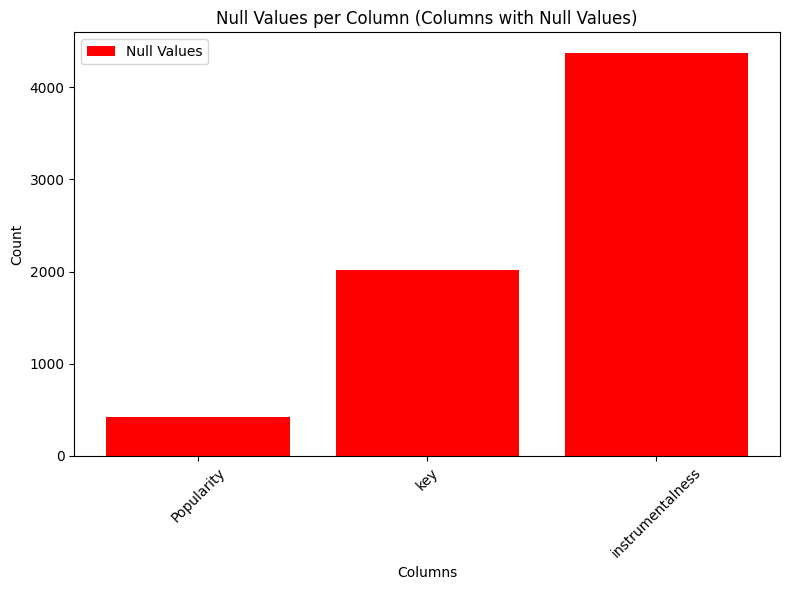

In [33]:
# Calculate the number of null values in each column
null_counts = df.isnull().sum()
print(null_counts)

# Filter columns with null values
columns_with_null = null_counts[null_counts > 0].index
# Create a subplot for the null values
fig, ax = plt.subplots(figsize=(8, 6))

# Plot null values only for columns with null values
ax.bar(columns_with_null, null_counts[columns_with_null], color='red', label='Null Values')

# Set labels and legend
ax.set_xlabel('Columns')
ax.set_ylabel('Count')
ax.set_title('Null Values per Column (Columns with Null Values)')
ax.legend()

# Adjust layout and show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Class
Rock             4949
Indie            2587
Pop              2524
Metal            1854
HipHop           1447
Alt_Music        1373
Blues            1272
Acoustic/Folk     625
Instrumental      576
Bollywood         402
Country           387
Name: count, dtype: int64


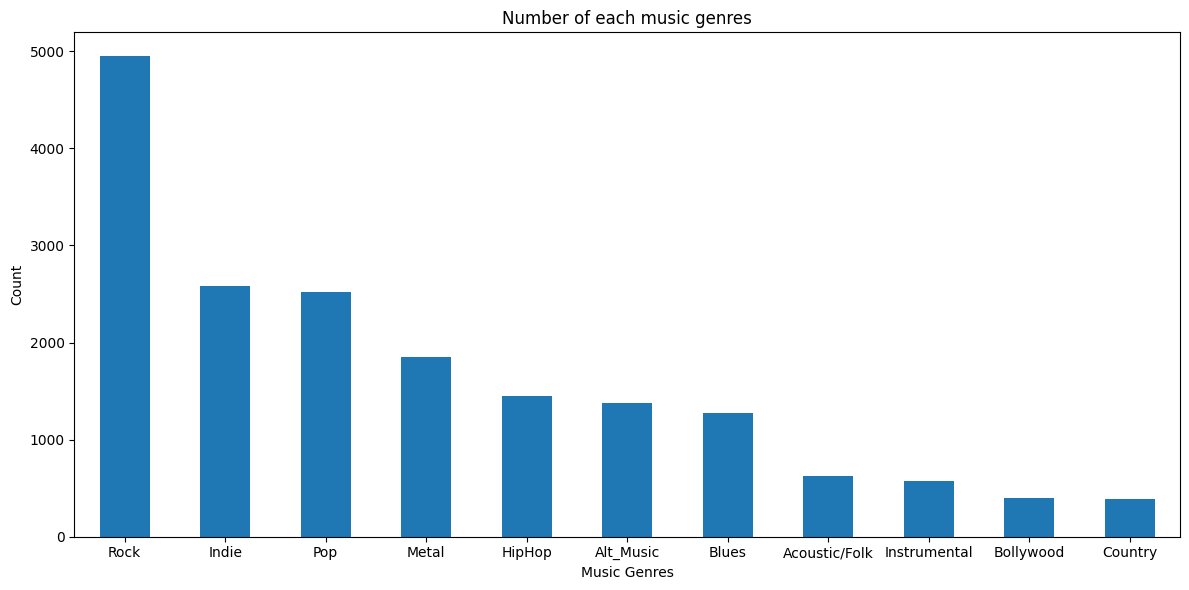

In [34]:

class_dict = {0: 'Acoustic/Folk', 1: 'Alt_Music', 2: 'Blues', 3: 'Bollywood', 4: 'Country', 5: 'HipHop', 6: 'Indie', 7: 'Instrumental', 8: 'Metal', 9: 'Pop', 10: 'Rock',}
label_renamed_df = df['Class'].replace(class_dict)


# Calculate the number of null values in each column
class_count = label_renamed_df.value_counts()
print(class_count)
# class_count

# Create a bar graph to display the counts
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the counts
class_count.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Music Genres')
ax.set_ylabel('Count')
ax.set_title('Number of each music genres')

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [35]:
# Preprocessing data

# Drop unrelavant column
# thinking that artist's name has some relationships with genres of song so I don't drop it
columns_to_drop = ['Track Name']
nonfeature_dropped = df.drop(columns=columns_to_drop, axis=1)

# X is feature dataframe
X = nonfeature_dropped.iloc[:, :-1]

# y is label
y = nonfeature_dropped.iloc[:, -1]


# Specify the columns to fill with their respective means
columns_to_fill = ['Popularity', 'key', 'instrumentalness']

# Replace NaN values with the mean of the specified columns
X["Popularity"].fillna(X["Popularity"].mean(), inplace=True)
X["key"].fillna(X["key"].mean(), inplace=True)
X["instrumentalness"].fillna(X["instrumentalness"].mean(), inplace=True)

# Encode categorical variables using LabelEncoder
labelencoders = {}

for column in X.columns:
    if X[column].dtype == type(object):
        labelencoder = LabelEncoder()
        # Fit the label encoder and include 'Unknown' in the classes
        labelencoder.fit(list(X[column].astype(str).fillna('Unknown')) + ['Unknown'])
        X[column] = labelencoder.transform(X[column].astype(str).fillna('Unknown'))
        labelencoders[column] = labelencoder
X

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,1182,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4
1,1092,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4
2,7899,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4
3,1987,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4
4,6283,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,3042,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3
17992,5122,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4
17993,7032,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4
17994,797,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4


In [36]:
# Oversample the minority class using SMOTE

# before oversamlping
print('Original class distribution:', Counter(y))

# oversampling
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# after oversamlping
print('Resampled class distribution:', Counter(y))

Original class distribution: Counter({10: 4949, 6: 2587, 9: 2524, 8: 1854, 5: 1447, 1: 1373, 2: 1272, 0: 625, 7: 576, 3: 402, 4: 387})
Resampled class distribution: Counter({5: 4949, 10: 4949, 6: 4949, 2: 4949, 4: 4949, 8: 4949, 9: 4949, 3: 4949, 7: 4949, 1: 4949, 0: 4949})


In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [39]:
clf = DecisionTreeClassifier(max_depth=100, min_samples_split=10, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.65604335047759


In [14]:
class_names=clf.classes_
class_names

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

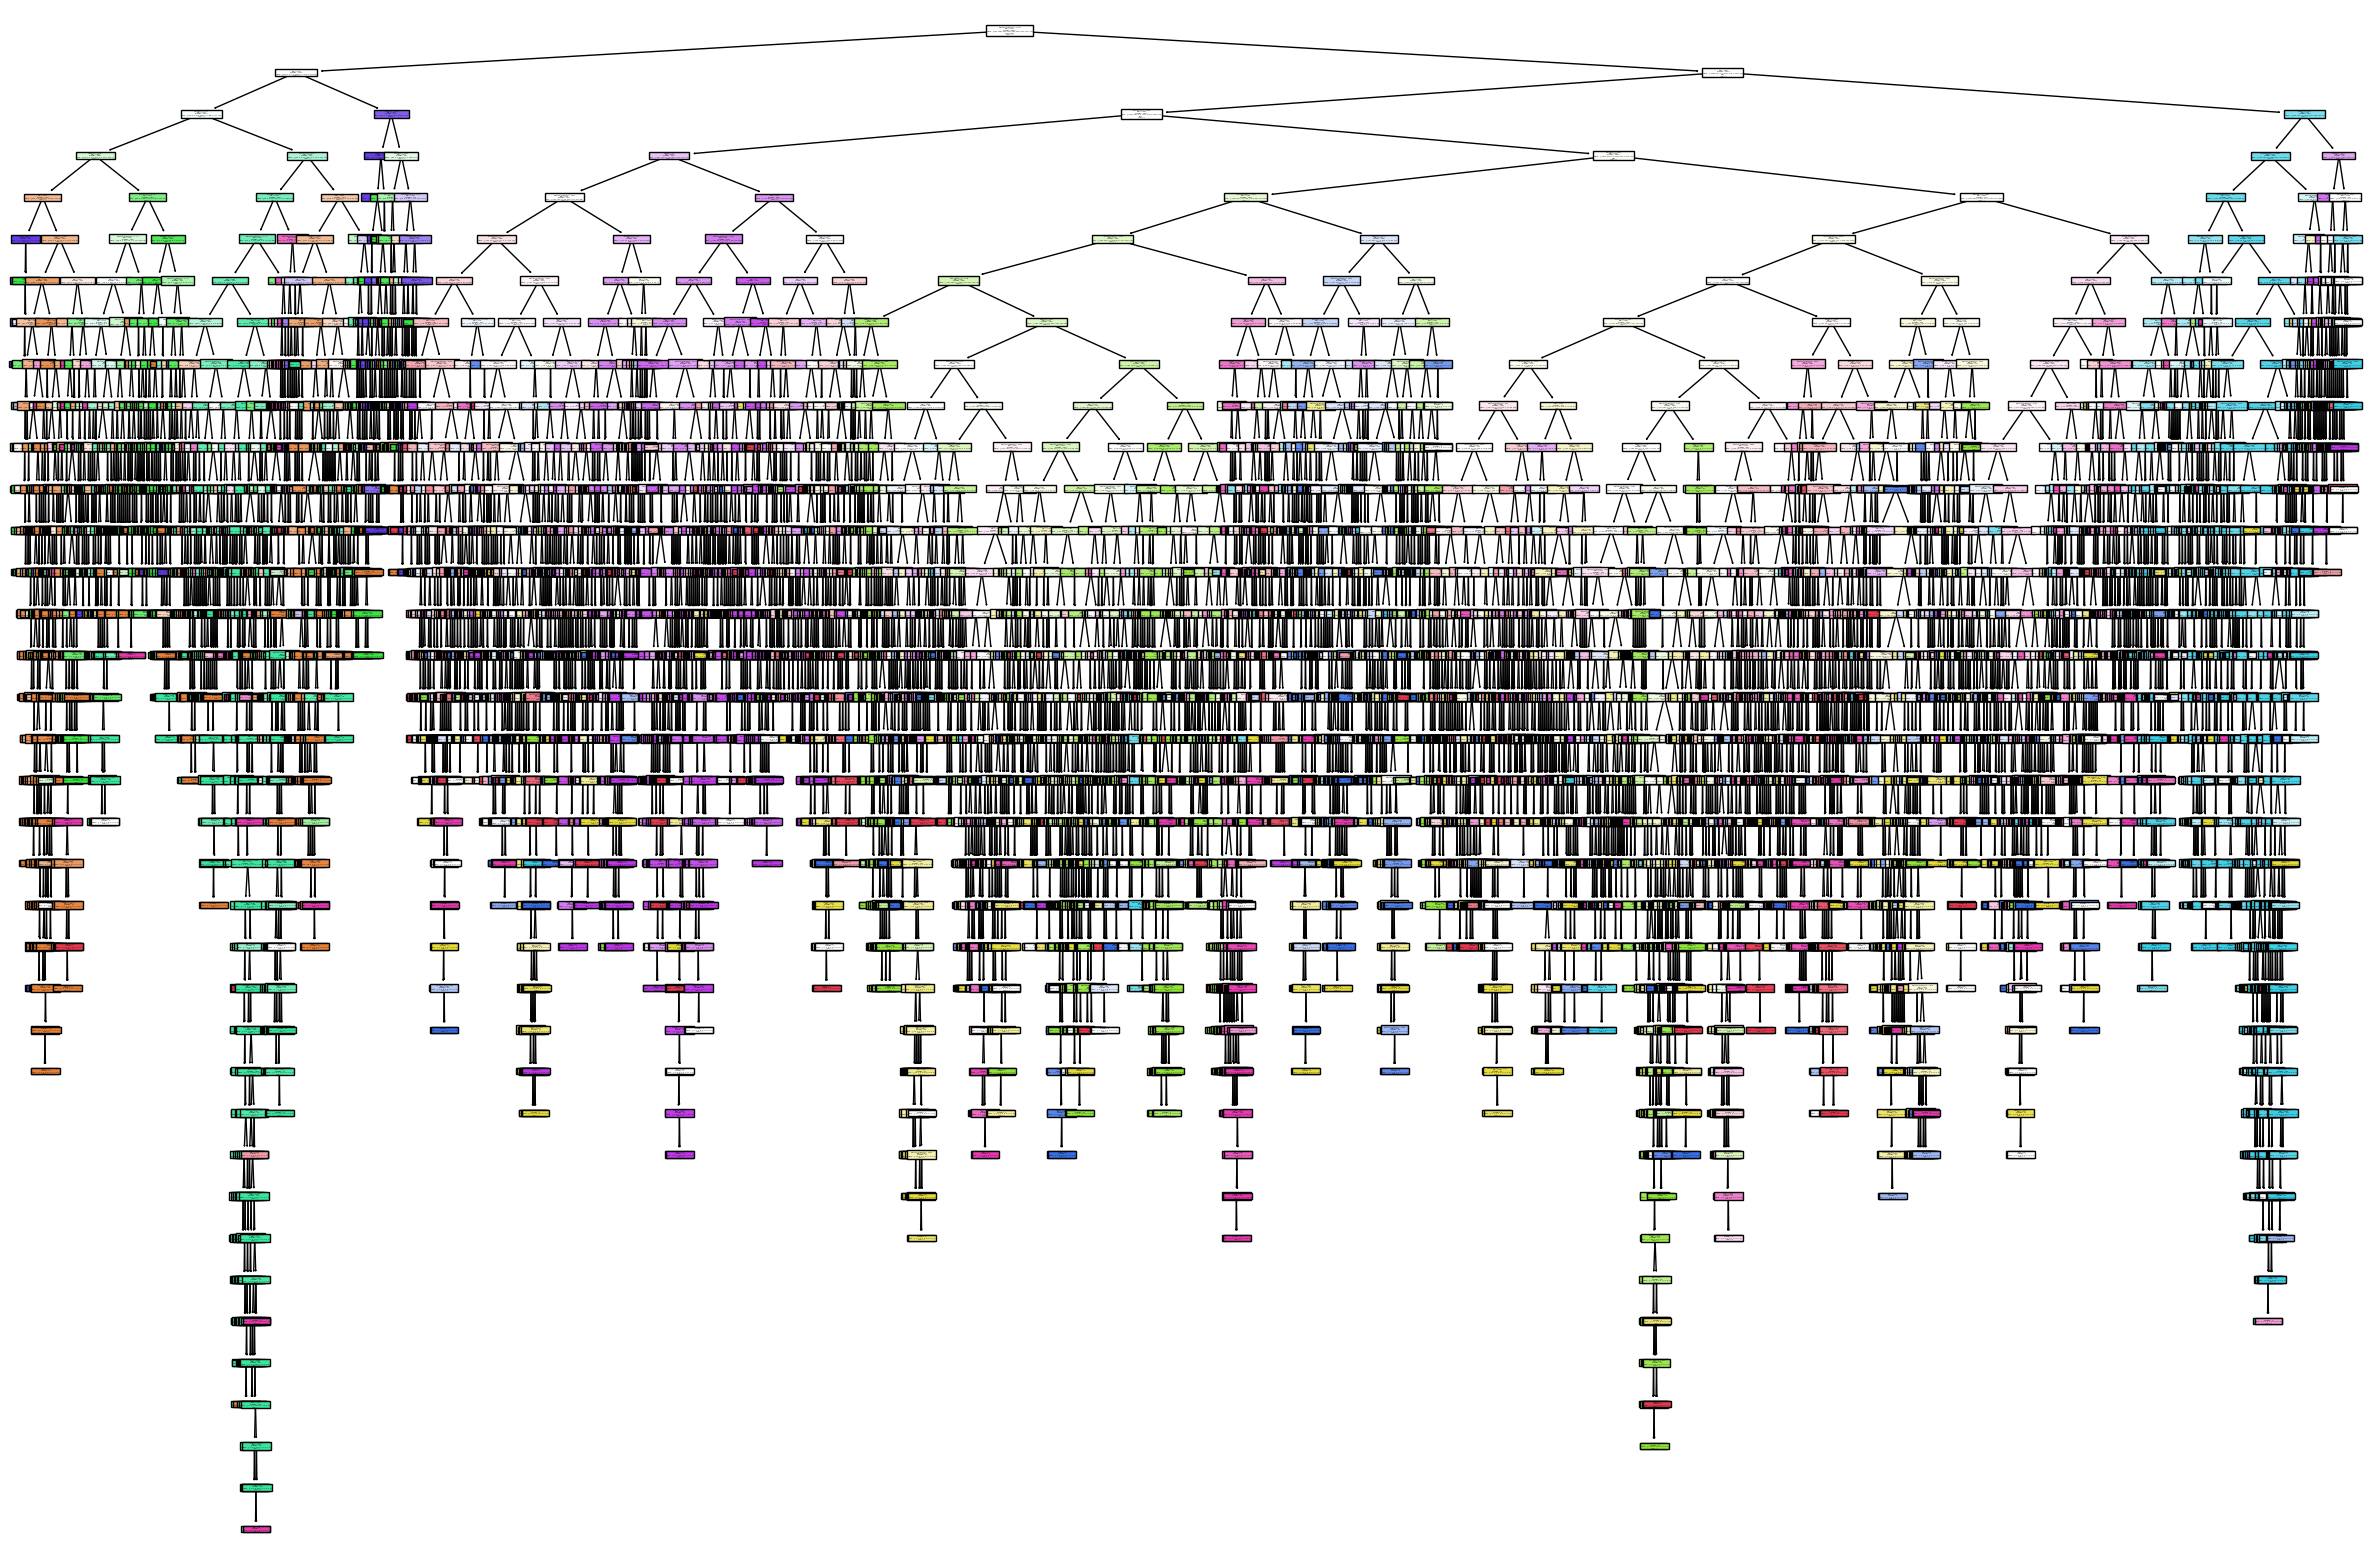

<Figure size 640x480 with 0 Axes>

In [15]:
# Visualize the decision tree
plt.figure(figsize=(30, 20))

# Convert the integer feature names to strings
feature_names = [str(feature) for feature in X.columns]
class_names = [str(label) for label in clf.classes_]

plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

# Save the decision tree image
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')

In [40]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1010
           1       0.35      0.43      0.39       948
           2       0.64      0.64      0.64       972
           3       0.92      0.93      0.92      1019
           4       0.89      0.93      0.91       964
           5       0.75      0.74      0.74      1021
           6       0.32      0.32      0.32       980
           7       0.97      0.96      0.96      1010
           8       0.68      0.66      0.67       983
           9       0.51      0.47      0.49      1006
          10       0.28      0.25      0.27       975

    accuracy                           0.66     10888
   macro avg       0.65      0.65      0.65     10888
weighted avg       0.66      0.66      0.66     10888



In [41]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[870   0   0  43  69   0   0  16   0  12   0]
 [  0 411  77   0   0  41 205   0  47  50 117]
 [  0  87 626   0   0  22  64   0  18  74  81]
 [ 46   0   0 945  15   0   0  10   0   3   0]
 [ 43   0   0   7 898   0   0   2   0   7   7]
 [  0  60  35   0   0 752  49   0   6  90  29]
 [  0 253  87   0   0  47 310   0  49 104 130]
 [ 29   0   0  12   1   0   0 968   0   0   0]
 [  0  69  19   0   0   7  67   0 647   9 165]
 [ 18  96  66  14  10 102 115   0  19 469  97]
 [  9 184  69   4  11  31 148   1 169 102 247]]


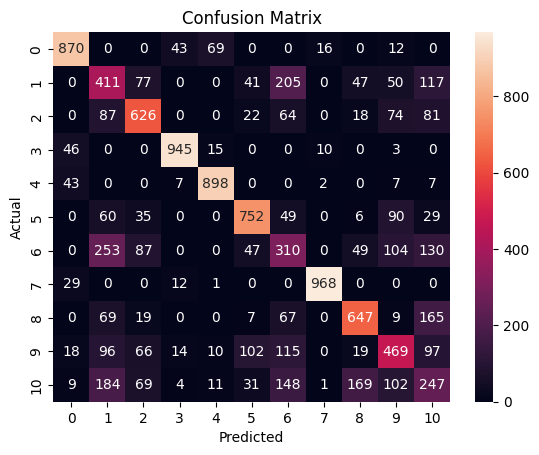

In [42]:
# confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Load the test data
test_data = pd.read_csv('test.csv')

In [20]:
# Preprocessing test data (just the same with training data)
columns_to_drop = ['Track Name']
X = test_data.drop(columns=columns_to_drop, axis=1)



# Specify the columns to fill with their respective means
columns_to_fill = ['Popularity', 'key', 'instrumentalness']

# Replace NaN values with the mean of the specified columns
X["Popularity"].fillna(X["Popularity"].mean(), inplace=True)
X["key"].fillna(X["key"].mean(), inplace=True)
X["instrumentalness"].fillna(X["instrumentalness"].mean(), inplace=True)

labelencoders = {}

# Encode categorical variables using LabelEncoder
for column in X.columns:
    if X[column].dtype == type(object):
        labelencoder = LabelEncoder()
        # Fit the label encoder and include 'Unknown' in the classes
        labelencoder.fit(list(X[column].astype(str).fillna('Unknown')) + ['Unknown'])
        X[column] = labelencoder.transform(X[column].astype(str).fillna('Unknown'))
        labelencoders[column] = labelencoder

# Impute and scale the test data
X_test_scaled = scaler.transform(X)
X_test_scaled

array([[-1.34774276,  1.8512559 , -1.53759304, ...,  0.5302192 ,
         1.33291707,  0.39029911],
       [-1.38859933, -0.55142585, -0.21856527, ...,  1.1804977 ,
         0.58206066,  0.39029911],
       [-0.50350455,  2.15929202,  1.02171457, ...,  0.0660432 ,
         0.44781048,  0.39029911],
       ...,
       [-0.27761485, -0.30499695,  1.71075893, ...,  0.55793342,
        -1.11335876,  0.39029911],
       [-0.13697395,  0.49589697,  1.68450962, ...,  0.48458758,
         0.5890374 ,  0.39029911],
       [-0.67125221,  0.12625362,  0.56235167, ...,  1.33247893,
         0.42444189,  0.39029911]])

In [25]:
# Make predictions with the trained model
test_predictions = clf.predict(X_test_scaled)
test_data["prediction"] = test_predictions

# Output or use the test_predictions as needed
print(test_predictions)
pd.DataFrame(test_data).to_csv('predictions_tree.csv', index=False)


[10  8 10 ...  3  5  5]
